In [13]:
import json
import ase
from ase import Atoms

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["font.family"] = "Helvetica"
plt.rcParams["mathtext.fontset"] ='custom'
plt.rcParams['mathtext.rm'] = 'Helvetica'
plt.rcParams['mathtext.it'] = 'Helvetica:italic'
plt.rcParams['mathtext.bf'] = 'Helvetica'
plt.rcParams["font.size"] = "8"
plt.rcParams['axes.linewidth'] = 0.75
plt.rcParams['lines.linewidth'] = 0.75
plt.rcParams['lines.markersize'] = 4

In [14]:
! ls ../../../Data/Jsons/SQS_jsons/

LNMO_SQS_1_O_vac.json         LNMO_SQS_3_O_vac.json
LNMO_SQS_2_O_vac.json         LNMO_SQS_fully_lithiated.json


In [15]:
O_vac_0 = {'struc':[], 'E': [], 'comp':[], 'vol':[]}
O_vac_1 = {'struc':[], 'E': [], 'comp':[], 'vol':[]}
O_vac_2 = {'struc':[], 'E': [], 'comp':[], 'vol':[]}
O_vac_3 = {'struc':[], 'E': [], 'comp':[], 'vol':[]}

path = '../../../Data/Jsons/SQS_jsons'
def get_json(filename, results):

    with open(f'{path}/{filename}.json') as data:
            cluster_data = json.load(data)
    for calculation in (cluster_data['calculation_results']):
        atoms = ase.Atoms(numbers=calculation['structure']['numbers'],
                          positions=calculation['structure']['positions'],
                          pbc=calculation['structure']['pbc'],
                          cell=calculation['structure']['cell'])
        numbers = atoms.numbers
        energy = float(calculation['energy']) *27.2114 # The CRYSTAL17 code returns energies 
        # in Hartree, so the output is converted to electronvolts (1 Ha = 27.2114 eV)
        x_O = - (( ((np.count_nonzero(numbers == 8) - 48)/48)*100 ) ) # oxygen deficiency
        vol = atoms.cell.volume / 8 # volume per unit cell 
        results['E'].append(energy)
        results['comp'].append(x_O)
        results['vol'].append(vol)
        results['struc'].append(atoms)

get_json('LNMO_SQS_fully_lithiated',O_vac_0)
get_json('LNMO_SQS_1_O_vac',O_vac_1)
get_json('LNMO_SQS_2_O_vac',O_vac_2)
get_json('LNMO_SQS_3_O_vac',O_vac_3)

data = [list(O_vac_0['vol']), 
        list(O_vac_1['vol']), 
        list(O_vac_2['vol']), 
        list(O_vac_3['vol']) ]

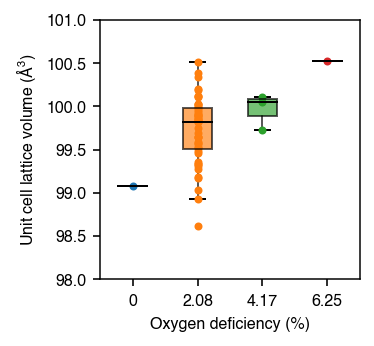

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(2.0, 1.8))
a = axes
colors = ['tab:blue',
          'tab:orange',
          'tab:green',
          'tab:red',
          'tab:purple',
          'tab:brown',
          'tab:pink']

whiskerprops = dict(color = 'k', alpha = 0.65)
capprops = dict(color = 'k', alpha = 0.65)
flierprops = dict(marker='o', markerfacecolor='grey', markersize=1, alpha = 0.65,
                  linestyle='none')
medianprops = dict(linestyle='-', linewidth=1.0, color='k')
box = a.boxplot(data, 
                flierprops=flierprops, 
                medianprops=medianprops, 
                whiskerprops = whiskerprops, 
                patch_artist=True)

marker_size = 3
a.plot([1]*len(O_vac_0['vol']),O_vac_0['vol'],'o', markersize = marker_size)
a.plot([2]*len(O_vac_1['vol']),O_vac_1['vol'],'o', markersize = marker_size)
a.plot([3]*len(O_vac_2['vol']),O_vac_2['vol'],'o', markersize = marker_size)
a.plot([4]*len(O_vac_3['vol']),O_vac_3['vol'],'o', markersize = marker_size)

for patch, color in zip(box['boxes'], colors):
    patch.set_edgecolor('k')
    patch.set_facecolor(color)
    patch.set_alpha(0.65)

a.set_xlabel('Oxygen deficiency (%)')
a.set_ylabel('Unit cell lattice volume (Å$^{3}$)')

x1 = [-1,10]
y1 = [0,0]
a.set_xlim([0.5, 4.5])
a.set_ylim([98, 101.0])
a.set_xticks([1,2,3,4])
a.set_xticklabels(['0','2.08','4.17','6.25',])

fig.subplots_adjust(bottom=0.0, top=1.0, left=0.0, right=0.9,
                    wspace=0.2, hspace=0.075)

plt.savefig('Figure_S13-lattice_volume_expansion.svg', dpi=300, bbox_inches='tight')
plt.savefig('Figure_S13-lattice_volume_expansion.png', dpi=300, bbox_inches='tight')

plt.show()